In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

(150, 4)


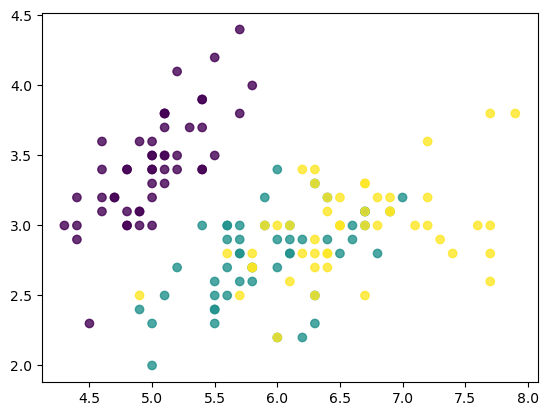

In [3]:
iris = load_iris()

x = iris.data
y=iris.target

print(x.shape)
plt.scatter(x[:,0],x[:,1], c=y,alpha=0.8)

In [4]:
#we need to divise this dataset for doing the test and validate our model
from sklearn.model_selection import train_test_split 

In [5]:
#division of dataset with train test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
print('train set :', x_train.shape)
print('test set ;', x_test.shape)

train set : (120, 4)
test set ; (30, 4)


Text(0.5, 1.0, 'test set')

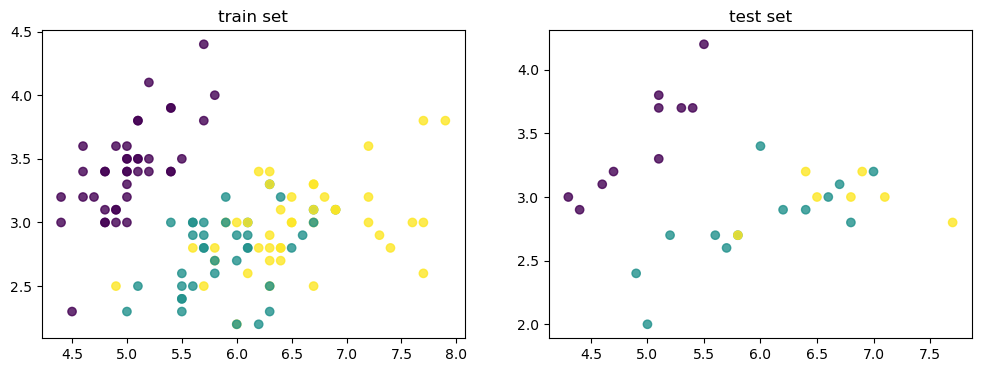

In [6]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(x_train[:,0],x_train[:,1], c=y_train, alpha=0.8)
plt.title('train set')
plt.subplot(122)
plt.scatter(x_test[:,0],x_test[:,1] , c=y_test, alpha=0.8)
plt.title('test set')

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
model = KNeighborsClassifier(n_neighbors=1)

model.fit(x_train, y_train)
print('train score: ', model.score(x_train, y_train))
print('train score: ', model.score(x_test, y_test))

train score:  1.0
train score:  1.0


In [9]:
#Amelioration of model
from sklearn.model_selection import cross_val_score

In [10]:
cross_val_score(KNeighborsClassifier(),x_train, y_train, cv=5 , scoring='accuracy').mean()

0.95

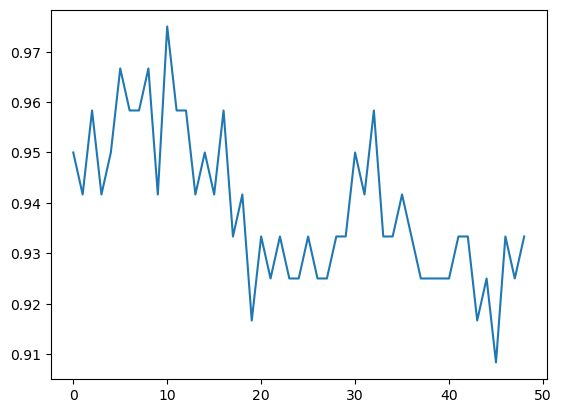

In [11]:
val_score=[ ]
for k in range(1,50):
    score = cross_val_score(KNeighborsClassifier(k),x_train, y_train, cv=5 , scoring='accuracy').mean()
    val_score.append(score)
plt.plot(val_score)

In [14]:
from sklearn.model_selection import validation_curve

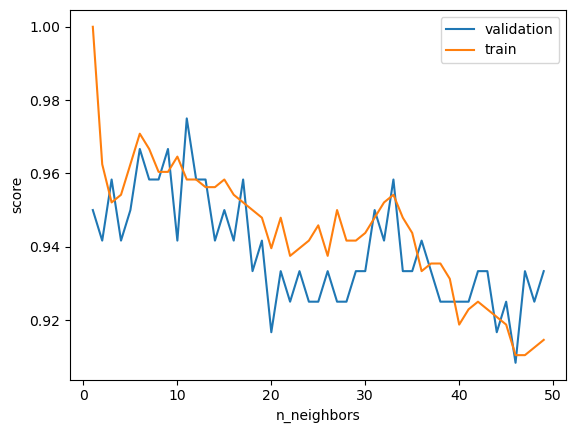

In [24]:
model = KNeighborsClassifier()
k= np.arange(1, 50)

train_score, val_score = validation_curve(model, x_train, y_train,param_name='n_neighbors',param_range=k, cv=5)

plt.plot(k,val_score.mean(axis=1),label='validation')
plt.plot(k,train_score.mean(axis=1), label='train')

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

In [25]:
from sklearn.model_selection import GridSearchCV

In [27]:
param_grid = {
    'n_neighbors': np.arange(1,20),
    'metric': ['euclidean','manhattan']
}

grid = GridSearchCV(KNeighborsClassifier(),param_grid,cv=5 )
grid.fit(x_train,y_train)

/home/johary/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [28]:
grid.best_score_

0.975

In [29]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 11}

In [30]:
model = grid.best_estimator_ 

In [31]:
model.score(x_test, y_test)

1.0